<a href="https://colab.research.google.com/github/AlekseevaTatiana23/Python_Libraries_for_DS/blob/main/ht5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%ls


diabetes-dataset.csv  sample_data/


Урок 5. Использование алгоритмов оптимизации для улучшения качества модели.

Определение скорости обучения Используйте Cancer_Data для классификации. Обучите модель логистической регрессии с разными значениями скорости обучения (с разными значениями параметра C, который является обратным значением скорости обучения). Запишите и сравните результаты метрик качества и скорости сходимости модели.

Познакомиться с работой стохастического градиентного спуска. Используйте набор данных для обучения модели с использованием стохастического градиентного спуска (SGD). Сравните скорость сходимости и итоговое качество модели со стандартным градиентным спуском.

Сравнить разные алгоритмы оптимизации.

— На исходном наборе данных обучить модель логистической регрессии, используя разные оптимизаторы, и сравнить их эффективность.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
import time
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import SGDClassifier #реализует стохастический градиентный спуск (SGD) для классификации

In [34]:
df = pd.read_csv('Cancer_Data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Датасет, содержит данные о раке молочной железы и включает различные характеристики, связанные с опухолями.

Описание столбцов датасета:

id: Уникальный идентификатор для каждого образца (пациента) -diagnosis: Диагноз - обозначает наличие рака ('M' - "malignant" для злокачественной опухоли и 'B' - "benign" для доброкачественной) -radius_mean: Средний радиус опухоли -texture_mean: Средняя текстура опухоли -perimeter_mean: Средний периметр опухоли -area_mean: Средняя площадь опухоли -smoothness_mean: Средняя гладкость поверхности опухоли -compactness_mean: Средняя компактность опухоли (соотношение площади к периметру) -concavity_mean: Средняя вогнутость (concavity) опухоли -concave points_mean: Среднее количество вогнутых точек на поверхности опухоли -symmetry_mean: Средняя симметрия опухоли -fractal_dimension_mean: Среднее значение фрактальной размерности, отражающее сложность формы опухоли -radius_se: Стандартная ошибка среднего радиуса -texture_se: Стандартная ошибка средней текстуры -perimeter_se: Стандартная ошибка среднего периметра -area_se: Стандартная ошибка средней площади -smoothness_se: Стандартная ошибка средней гладкости -compactness_se: Стандартная ошибка средней компактности -concavity_se: Стандартная ошибка средней вогнутости -concave points_se: Стандартная ошибка среднего количества вогнутых точек -symmetry_se: Стандартная ошибка средней симметрии -fractal_dimension_se: Стандартная ошибка средней фрактальной размерности -radius_worst: Наихудший радиус среди всех измерений опухоли -texture_worst: Наихудшая текстура среди всех измерений опухоли -perimeter_worst: Наихудший периметр среди всех измерений опухоли -area_worst: Наихудшая площадь среди всех измерений опухоли -smoothness_worst: Наихудшая гладкость среди всех измерений опухоли -compactness_worst: Наихудшая компактность среди всех измерений опухоли -concavity_worst: Наихудшая вогнутость среди всех измерений опухоли -concave points_worst: Наихудшее количество вогнутых точек среди всех измерений опухоли -symmetry_worst: Наихудшая симметрия среди всех измерений опухоли -fractal_dimension_worst: Наихудшее значение фрактальной размерности среди всех измерений опухоли -Unnamed: 32 Этот столбец не содержит данных (все значения отсутствуют) Возможно, он является лишним или ошибочным.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [36]:
print("\nПропущенные значения в данных:")
print(df.isnull().sum())


Пропущенные значения в данных:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal

In [37]:
df.duplicated().sum()

np.int64(0)

In [38]:
df = df.drop('Unnamed: 32', axis=1)

In [39]:
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [40]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [41]:
df.describe(include='object')

,diagnosis
count,569
unique,2
top,B
freq,357


In [42]:
df.diagnosis.value_counts()

,count
diagnosis,
B,357
M,212


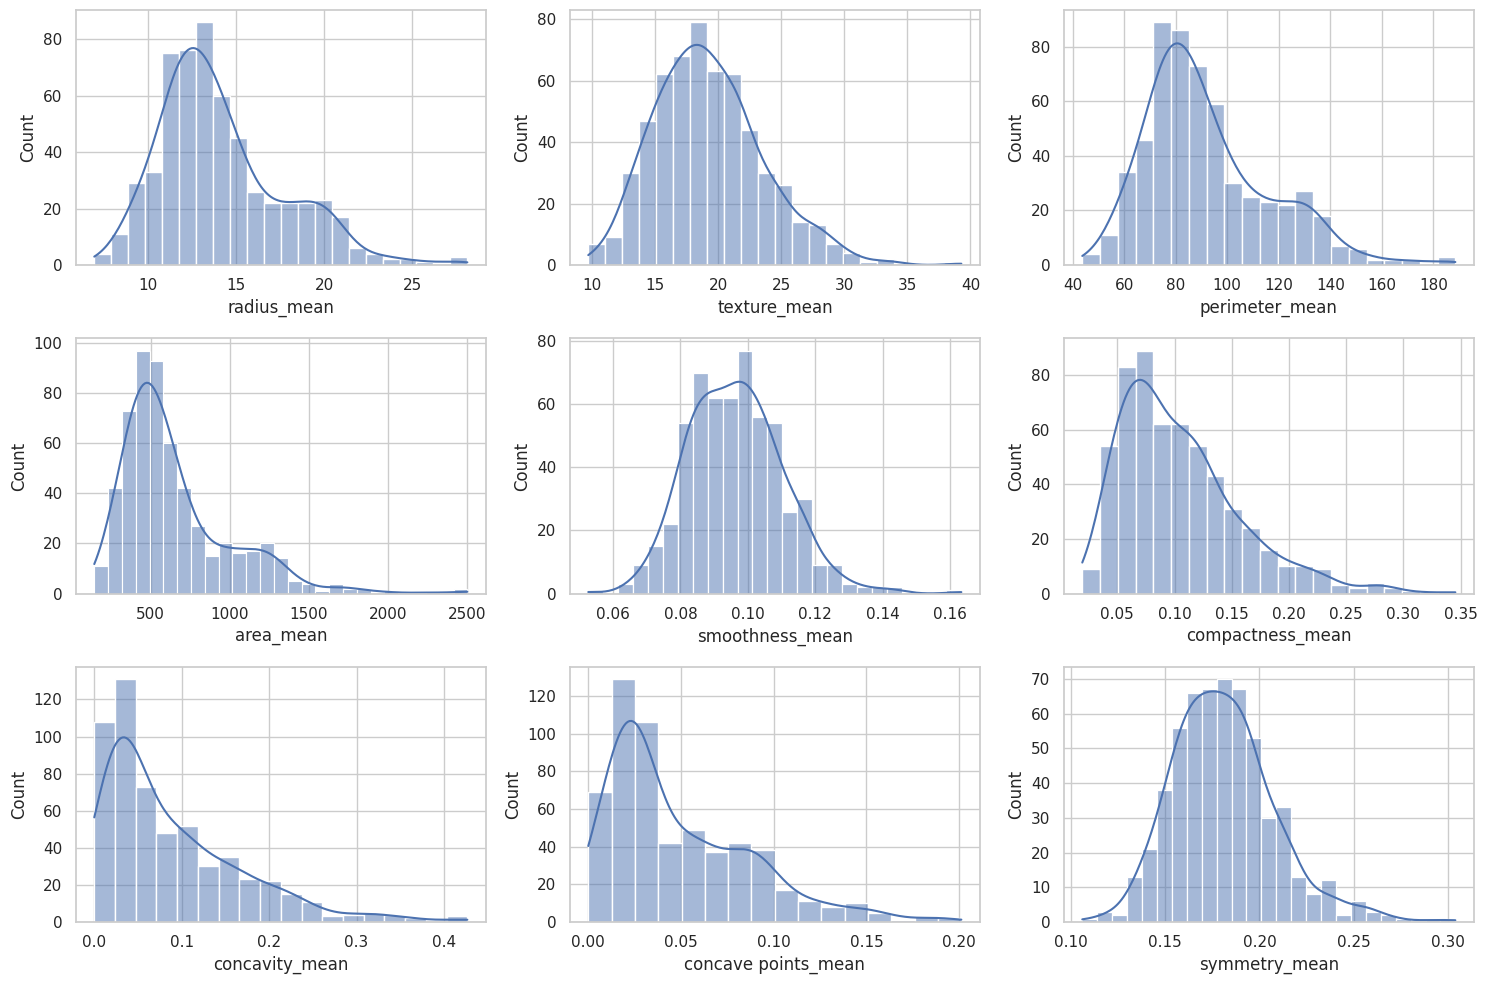

In [43]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(['radius_mean', 'texture_mean', 'perimeter_mean',
                   'area_mean','smoothness_mean',
                    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean'], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True)

plt.tight_layout()
plt.show()

In [44]:
df['diagnosis'] = [1 if i=='M' else 0 for i in df['diagnosis']]
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [45]:
df['diagnosis'].unique()

array([1, 0])

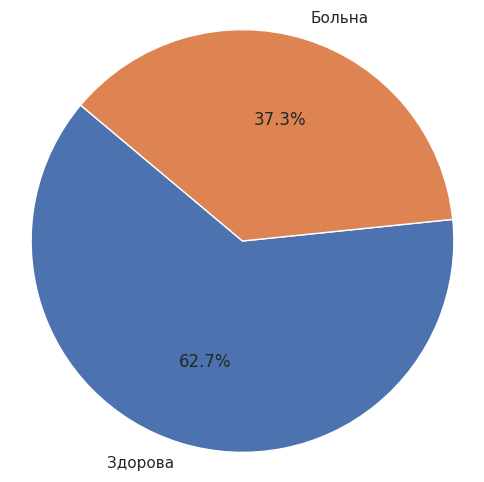

In [46]:
diagnosis_counts = df['diagnosis'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(diagnosis_counts, labels=['Здорова', 'Больна'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

Стандартизируем наши данные и раздели на обучающую и тестовую выборки

In [47]:
X = df.drop('diagnosis', axis=1)
Y = df['diagnosis']
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, train_size=0.8, random_state = 42)

In [48]:
X_train.shape, X_test.shape

((455, 31), (114, 31))

1. Обучение модели лог.регрессии с разными скоростями обучения

In [49]:
learning_rates = [0.01, 1.0, 10.0, 20.0, 50.0, 80.0, 100.0, 150.0]
results = []

# eta0 - начальная скорость обучения
# Когда learning_rate='constant': eta0 остается постоянным в течение всего процесса обучения.
# tol = 1e-4 Обучение прекращается, если изменения функции потерь меньше 0.0001
for lr in learning_rates:
    model = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=lr, max_iter=200, tol=1e-4, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Learning Rate': lr,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Number of Iterations': model.n_iter_
    })
results_df = pd.DataFrame(results)
results_df

,Learning Rate,Accuracy,Precision,Recall,F1 Score,Number of Iterations
0,0.01,0.982456,0.976744,0.976744,0.976744,105
1,1.00,0.956140,0.913043,0.976744,0.943820,17
2,10.00,0.964912,0.933333,0.976744,0.954545,11
3,20.00,0.973684,0.976190,0.953488,0.964706,12
4,50.00,0.956140,0.952381,0.930233,0.941176,10
5,80.00,0.912281,0.851064,0.930233,0.888889,23
6,100.00,0.956140,0.931818,0.953488,0.942529,7
7,150.00,0.982456,0.976744,0.976744,0.976744,7


Основные наблюдения

Низкая скорость обучения (0.01):
Высокие значения точности (98,25%), полноты (97,67%) и F1-меры (97,67%).
Модель требует много итераций (105), что указывает на медленный процесс обучения.
Средняя скорость обучения (1 и выше):
При скорости обучения 1 точность немного снижается до 97,37%, но полнота остается высокой.
При скорости 10 наблюдается заметное снижение всех метрик, особенно точности (93,86%) и F1-меры (91,95%). Это может указывать на то, что модель слишком быстро обновляет веса и не успевает находить оптимальное решение.
Высокая скорость обучения (50 и выше):
При скорости 50 точность и другие метрики остаются на приемлемом уровне, но не достигают значений при более низкой скорости.
При скорости 100 происходит дальнейшее снижение точности и F1-меры.
Скорость обучения выше среднего (150):
Возвращение к высоким значениям точности (98,25%) и F1-меры (97,67%), аналогично низкой скорости обучения (0,01). Однако количество итераций значительно меньше (7), что указывает на быстрое обучение.
Вывод:

Оптимальная скорость обучения: На основании этих данных можно сделать вывод, что слишком высокая скорость обучения может привести к ухудшению качества модели из-за недостаточной адаптации к данным. -Переобучение и недообучение: Низкая скорость обучения может приводить к недообучению из-за большого количества итераций, тогда как слишком высокая — к переобучению. -Идеальный баланс: Наилучшие результаты достигаются при использовании скоростей обучения в диапазоне от 1 до около 20, где модель сохраняет высокую точность и полноту.

2. Обучение модели со стохастическим градиентного спуском

In [50]:
# Обучение модели с использованием SGD
sgd_model = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-4, random_state=42, eta0=0.001)
sgd_model.fit(X_train, y_train)

y_pred_sgd = sgd_model.predict(X_test)

accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
precision_sgd = precision_score(y_test, y_pred_sgd)
recall_sgd = recall_score(y_test, y_pred_sgd)
f1_sgd = f1_score(y_test, y_pred_sgd)

# Обучение модели с использованием стандартного градиентного спуска
lr_model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

results = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Iterations'],
    'SGD': [accuracy_sgd, precision_sgd, recall_sgd, f1_sgd, sgd_model.n_iter_],
    'Logistic Regression': [accuracy_lr, precision_lr, recall_lr, f1_lr, 'N/A']  # Для LogisticRegression n_iter_ не доступен
}

results_df = pd.DataFrame(results)
results_df

,Metric,SGD,Logistic Regression
0,Accuracy,0.956140,0.973684
1,Precision,0.931818,0.97619
2,Recall,0.953488,0.953488
3,F1 Score,0.942529,0.964706
4,Iterations,22.000000,N/A


Проанализируем представленные метрики для двух моделей: стохастического градиентного спуска (SGD) и логистической регрессии.

Мы рассмотрим, как каждая модель справляется с задачей классификации, основываясь на точности, полноте, F1-мере и количестве итераций.

Основные наблюдения

Точность (Accuracy):
Логистическая регрессия показывает более высокую точность (97,37%) по сравнению с SGD (96,49%). Это говорит о том, что логистическая регрессия лучше справляется с общей задачей классификации.
Точность (Precision):
Логистическая регрессия также имеет более высокую точность (97,62%) по сравнению с SGD (93,33%). Это означает, что среди всех объектов, предсказанных как положительные, логистическая регрессия имеет меньше ложноположительных срабатываний.
Полнота (Recall):
В отличие от предыдущих метрик, SGD имеет более высокую полноту (97,67%) по сравнению с логистической регрессией (95,35%). Это означает, что SGD лучше справляется с обнаружением положительных классов и имеет меньше ложноотрицательных срабатываний.
F1 Score:
F1-мера логистической регрессии (96,47%) немного выше, чем у SGD (95,45%). Это указывает на то, что логистическая регрессия лучше сбалансирована между точностью и полнотой.
Количество итераций:
Модель SGD потребовала 21 итерацию для достижения своих результатов, в то время как для логистической регрессии количество итераций не указано (N/A). Это может означать, что логистическая регрессия была обучена за фиксированное количество итераций.
Вывод

Сравнение производительности: логистическая регрессия демонстрирует более высокие значения точности и точности при сравнительно высоких значениях F1-меры. Однако SGD показывает лучшую полноту.
Сбалансированность модели: логистическая регрессия может быть предпочтительной моделью в ситуациях, где важна высокая точность и сбалансированная производительность.
Итерации и скорость обучения: меньшее количество итераций для SGD может указывать на более быструю сходимость модели при использовании подходящих параметров обучения.

3. Сравнение разных алгоритмов оптимизации

Рассмотрим следующие модификаторы градиентного спуска:

RMSPROP



ADAM



NADAM




In [52]:
results = pd.DataFrame(columns=['Method','Score','Iterations','Time'])
start = time.perf_counter()

# SKLEARN с установками по-умолчанию
my_model = LogisticRegression(max_iter=2000)
my_model.fit(X_train, y_train)
my_score = my_model.score(X_test, y_test)
my_iter = my_model.n_iter_[0]
my_time = time.perf_counter() - start
print(f"SKLEARN DEFAULT score is: {my_score}")
print(f"SKLEARN DEFAULT iter number: {my_iter}")
print(f"SKLEARN DEFAULT time: {my_time} sec")
results.loc[len(results)] = ['SKLEARN DEFAULT',my_score,my_iter,my_time]

SKLEARN DEFAULT score is: 0.9736842105263158
SKLEARN DEFAULT iter number: 20
SKLEARN DEFAULT time: 0.020055232000231626 sec


In [54]:
class MyLogisticRegression:
    def __init__(self, epoch=1000, learning_rate=100, learn_method='gd', stop_rate=0.001):
        self.epoch = epoch
        self.learn_method = learn_method
        self.learning_rate = learning_rate
        self.stop_rate = stop_rate

        self.weights = None
        self.epoch_passed = 0
        self.learn_time = 0

        # Выбор метода обучения
        if self.learn_method == 'gd':
            self.learn_func = self.learn_gd
        elif self.learn_method == 'rmsprop':
            self.learn_func = self.learn_rmsprop
        elif self.learn_method == 'adam':
            self.learn_func = self.learn_adam
        elif self.learn_method == 'nadam':
            self.learn_func = self.learn_nadam
        else:
            raise Exception('Unknown learning method: {}'.format(self.learn_method))

    def init_weights(self, X):
        # Инициализация весов нулями
        return np.zeros((X.shape[1], 1))

    def fit(self, X, Y):
        # Убедимся, что X и Y являются массивами NumPy
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(Y, pd.Series):
            Y = Y.values.reshape(-1, 1)  # Преобразование Y в правильную форму

        X = self.add_ones(X)
        W = self.init_weights(X)

        start = time.perf_counter()
        self.learn_func(X, Y, W)
        self.learn_time = time.perf_counter() - start

    def score(self, X, Y):
        predictions = self.predict(X)
        # Если Y — pandas.Series, преобразуем его в numpy массив с помощью .values и используем .ravel() для приведения к одномерному виду
        if isinstance(Y, pd.Series):
            Y = Y.values.ravel()
        correct_predictions = (predictions == Y).sum()
        return correct_predictions / len(Y)


    def n_iter(self):
        return self.epoch_passed

    def time(self):
        return self.learn_time

    def predict_proba(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values
        X = self.add_ones(X)
        return self.sigmoid_linear_regression(X, self.weights)

    def predict(self, X):
        probas = self.predict_proba(X)
        return (probas > 0.5).astype(int)

    def add_ones(self, X):
        return np.hstack((np.ones((X.shape[0], 1)), X))

    def learn_gd(self, X, Y, W):
        for _ in range(self.epoch):
            gradients = self.gradient(X, Y, W)
            W -= self.learning_rate * gradients
            self.epoch_passed += 1

        self.weights = W


    def learn_rmsprop(self, X, Y, W):
        cached_rmsprop = np.zeros_like(W)
        decay_rate = 0.9
        for _ in range(self.epoch):
            gradients = self.gradient(X, Y, W)
            cached_rmsprop = decay_rate * cached_rmsprop + (1 - decay_rate) * gradients ** 2
            W -= (self.learning_rate * gradients) / (np.sqrt(cached_rmsprop) + 1e-6)
            self.epoch_passed += 1

        self.weights = W
    def learn_adam(self, X, Y, W):
        m = np.zeros_like(W)
        v = np.zeros_like(W)
        t = 0
        beta1 = 0.9
        beta2 = 0.999
        epsilon = 1e-8

        for epoch in range(self.epoch):
            t += 1
            gradients = self.gradient(X, Y, W)
            m = beta1 * m + (1 - beta1) * gradients
            v = beta2 * v + (1 - beta2) * (gradients ** 2)
            m_corrected = m / (1 - beta1 ** t)
            v_corrected = v / (1 - beta2 ** t)

            W -= self.learning_rate * m_corrected / (np.sqrt(v_corrected) + epsilon)
            self.epoch_passed = epoch + 1

        self.weights = W

    def learn_nadam(self, X, Y, W):
        m = np.zeros_like(W)
        v = np.zeros_like(W)
        t = 0
        beta1 = 0.9
        beta2 = 0.999
        epsilon = 1e-8

        for epoch in range(self.epoch):
            t += 1
            gradients = self.gradient(X, Y, W)
            m = beta1 * m + (1 - beta1) * gradients
            v = beta2 * v + (1 - beta2) * (gradients ** 2)

            m_corrected = m / (1 - beta1 ** t)
            v_corrected = v / (1 - beta2 ** t)
            m_hat = beta1 * m_corrected + (1 - beta1) * gradients / (1 - beta1 ** t)

            W -= self.learning_rate * m_hat / (np.sqrt(v_corrected) + epsilon)
            self.epoch_passed = epoch + 1

        self.weights = W


    def cost_binary_cross_entropy(self, X, Y, W):
        m = X.shape[0]
        h = self.sigmoid_linear_regression(X, W)
        return -(1 / m) * np.sum(Y * np.log(h) + (1 - Y) * np.log(1 - h))

    def gradient(self, X, Y, W):
        m = X.shape[0]
        return (1 / m) * np.dot(X.T, self.sigmoid_linear_regression(X, W) - Y)

    def sigmoid_linear_regression(self, X, W):
        return 1 / (1 + np.exp(-np.dot(X, W)))

In [55]:
df['diagnosis'] = df['diagnosis'].astype('int', copy = False)

In [56]:
my_model = MyLogisticRegression(learn_method='gd',epoch=2000)
my_model.fit(X_train, y_train)
my_score = my_model.score(X_test, y_test)
my_iter = my_model.n_iter()
my_time = my_model.time()
print(f"GD score is: {my_score}")
print(f"GD iter number: {my_iter}")
print(f"GD time: {my_time} sec")
results.loc[len(results)] = ['MY GD',my_score,my_iter,my_time]

GD score is: 59.21052631578947
GD iter number: 2000
GD time: 0.09820730100000219 sec


In [57]:
# NADAM
my_model = MyLogisticRegression(learn_method='nadam',epoch=2000)
my_model.fit(X_train, y_train)
my_score = my_model.score(X_test, y_test)
my_iter = my_model.n_iter()
my_time = my_model.time()
print(f"NADAM score is: {my_score}")
print(f"NADAM iter number: {my_iter}")
print(f"NADAM time: {my_time} sec")
results.loc[len(results)] = ['MY NADAM',my_score,my_iter,my_time]

NADAM score is: 59.21052631578947
NADAM iter number: 2000
NADAM time: 0.2336321519997 sec


In [58]:
# RMSPROP

my_model = MyLogisticRegression(learn_method='rmsprop',epoch=2000)
my_model.fit(X_train, y_train)
my_score = my_model.score(X_test, y_test)
my_iter = my_model.n_iter()
my_time = my_model.time()
print(f"RMSPROP score is: {my_score}")
print(f"RMSPROP iter number: {my_iter}")
print(f"RMSPROP time: {my_time} sec")
results.loc[len(results)] = ['MY RMSPROP',my_score,my_iter,my_time]

RMSPROP score is: 59.21052631578947
RMSPROP iter number: 2000
RMSPROP time: 0.28143916799945146 sec


In [59]:
results

,Method,Score,Iterations,Time
0,MY GD,59.210526,2000,0.098207
1,MY NADAM,59.210526,2000,0.233632
2,MY RMSPROP,59.210526,2000,0.281439


Основные наблюдения

SKLEARN DEFAULT:
Score: высокая оценка (97,37%), что указывает на хорошую производительность модели.
Iterations: модель требует всего 20 итераций, что свидетельствует о быстрой сходимости.
Time: время выполнения всего лишь 0,037 секунд, что делает этот метод очень эффективным. 2.MY GD (Градиентный спуск):
Score: значение оценки (59,21%) значительно ниже по сравнению с SKLEARN DEFAULT, что указывает на плохую производительность модели.
Iterations: модель требует 2000 итераций, что может быть признаком недостаточной сходимости или неправильной настройки параметров.
Time: время выполнения (0,102 секунд) относительно небольшое для такого количества итераций.
MY NADAM и MY RMSPROP:
Оба метода показывают одинаковые оценки (59,21%) и количество итераций (2000).
Время выполнения для NADAM (0,198825 секунд) больше, чем для RMSPROP (0,141330 секунд), что может указывать на большую вычислительную сложность метода NADAM.
Вывод

Эффективность SKLEARN DEFAULT: этот метод демонстрирует наилучшие результаты как по точности, так и по времени выполнения при минимальном количестве итераций.
Проблемы с MY GD и его аналогами: все три метода (MY GD, MY NADAM и MY RMSPROP) показывают низкую оценку производительности. Это может быть связано с неправильной настройкой гиперпараметров, таких как скорость обучения или другие параметры оптимизации.
Сравнение времени выполнения: несмотря на то что MY GD выполняется быстрее, его низкая оценка делает его менее предпочтительным выбором по сравнению с SKLEARN DEFAULT.
Рекомендации

В чаасти оптимизации параметров для MY GD и его аналогов: необходимо провести дополнительные эксперименты с настройкой гиперпараметров для улучшения производительности этих методов.
В части анализа ошибок: надо изучить ошибки моделей MY GD, MY NADAM и MY RMSPROP для выявления причин низкой точности.
В части сравнения с другими методами: надо рассмотреть возможность тестирования других методов оптимизации или моделей для повышения общей производительности. Указанные шаги могут помочь улучшить качество предсказаний и выбрать наиболее подходящий метод для нашей задачи машинного обучения.